In [1]:
from util import *
from rbm import RestrictedBoltzmannMachine 
from dbn import DeepBeliefNet


image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

# ''' restricted boltzmann machine '''

# print ("\nStarting a Restricted Boltzmann Machine..")

# rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0]*image_size[1],
#                                  ndim_hidden=500,
#                                  is_bottom=True,
#                                  image_size=image_size,
#                                  is_top=False,
#                                  n_labels=10,
#                                  batch_size=20
# )

# rbm.cd1(visible_trainset=train_imgs, n_iterations=10000)


''' deep- belief net '''

print ("\nStarting a Deep Belief Net..")

dbn = DeepBeliefNet(sizes={"vis":image_size[0]*image_size[1], "hid":500, "pen":500, "top":2000, "lbl":10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=10
)

''' greedy layer-wise training '''

dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=1, n_epochs=15)


Starting a Deep Belief Net..
loaded rbm[vis--hid] from trained_rbm
loaded rbm[hid--pen] from trained_rbm
loaded rbm[pen+lbl--top] from trained_rbm


(1, 784)
(1, 784)
(1, 784)
(1, 784)
(1, 784)
(1, 784)
(1, 784)
(1, 784)
(1, 784)
(1, 784)


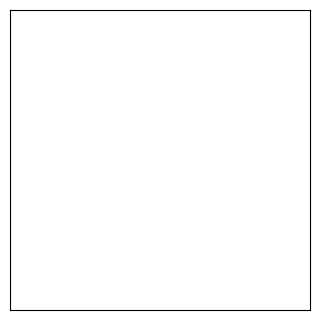

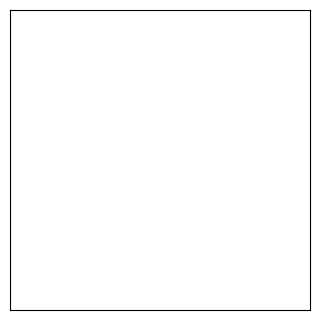

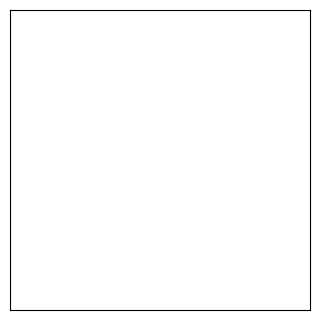

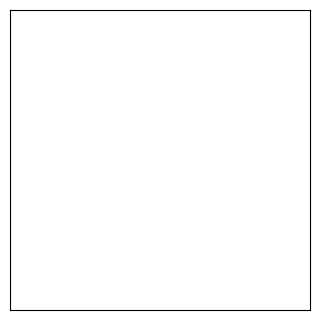

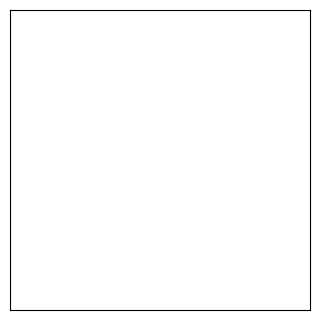

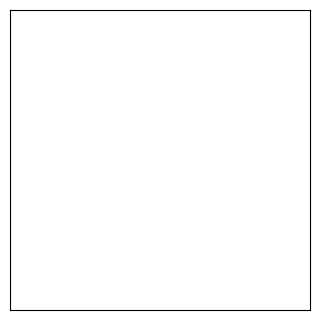

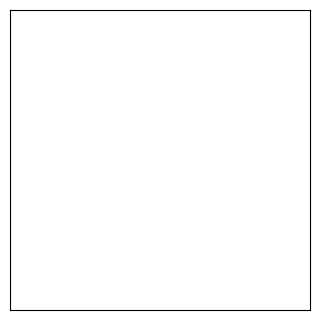

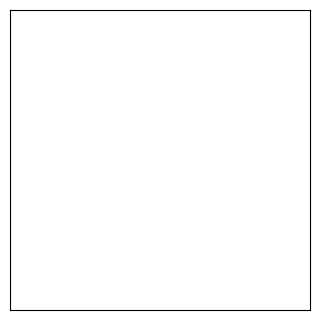

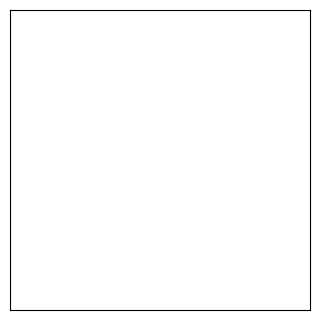

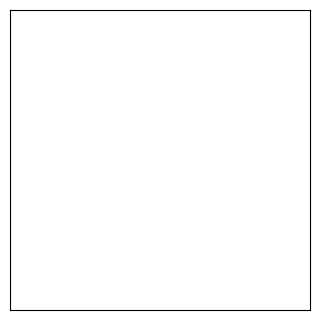

In [3]:
for digit in range(0,10):
    digit_1hot = np.zeros(shape=(1,10))
    digit_1hot[0,digit] = 1
    dbn.generate(digit_1hot, name="rbms")


In [2]:
''' recognize test data '''
print("trainacc")
for i in range(5):
    print("-- trial {} --".format(i))
    dbn.recognize(train_imgs, train_lbls)
    dbn.recognize(test_imgs, test_lbls)

trainacc
-- trial 0 --
accuracy = 63.10%
accuracy = 62.78%
-- trial 1 --
accuracy = 63.18%
accuracy = 63.26%
-- trial 2 --
accuracy = 63.09%
accuracy = 63.06%
-- trial 3 --
accuracy = 63.02%
accuracy = 63.26%
-- trial 4 --
accuracy = 63.03%
accuracy = 62.69%
